# Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf

# Fetching Classes

In [2]:
class_names = tf.keras.utils.image_dataset_from_directory("classes", labels = "inferred", verbose = False).class_names

# Loading Model

In [3]:
cnn = tf.keras.models.load_model("plant_disease_detection_and_classification.keras")

# Loading a random image from test folder

In [4]:
image_path = "test/" + random.choice(os.listdir("test"))
print("Fetched image:", image_path[5:])

Fetched image: TomatoEarlyBlight4.JPG


In [5]:
test_image = cv2.cvtColor(
    cv2.imread(image_path),
    cv2.COLOR_BGR2RGB
)

# Viewing the test image

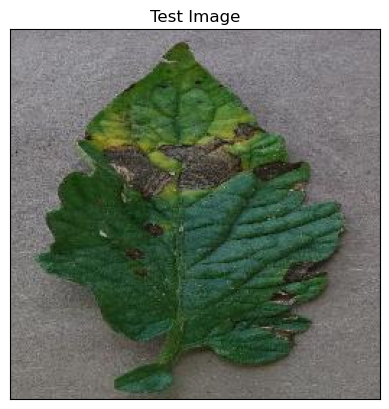

In [6]:
plt.imshow(test_image)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Converting test image to a batch

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size = (128,128))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array])

# Model Testing

In [8]:
detected_plant, detected_condition = class_names[np.argmax(cnn.predict(input_array))].split("___")
detected_condition = " ".join(detected_condition.split("_")).title()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


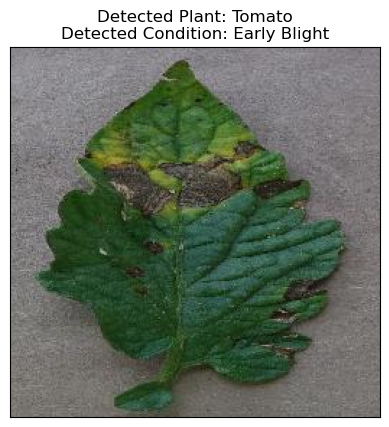

In [9]:
plt.imshow(test_image)
plt.title(f"Detected Plant: {detected_plant}\nDetected Condition: {detected_condition}")
plt.xticks([])
plt.yticks([])
plt.show()